# Unsupervised Learning tutorial

### Load data
* We'll be starting off using the iris dataset

In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
iris = datasets.load_iris()

### Print out the dictionary keys and the dataset description
* Save data and target to their own variables, and print their shape

In [4]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
data_array = iris["data"]

In [6]:
data_array.shape

(150, 4)

In [7]:
target_array = iris["target"]

In [9]:
target_array.shape

(150,)

In [10]:
print(iris["DESCR"])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [11]:
print(target_array)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


### Use your target array to make a list (called color_list) with different colors for the different targets
* With matplotlib's scatter function, make 2D plots comparing the different dimensions (use the color_list to ID the different classes)

In [12]:
color_list = []
for t, target in enumerate(target_array): 
    if target_array[t] == 0:
        color_list.append("red")
    elif target_array[t] == 1:
        color_list.append("blue")
    elif target_array[t] == 2:
        color_list.append("green")

In [13]:
print(color_list)

['red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green

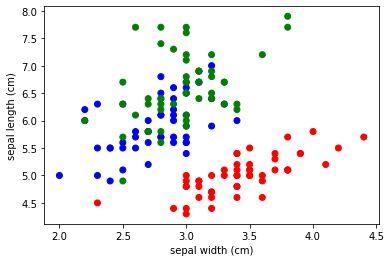

In [98]:
plt.scatter(data_array[:,1], data_array[:,0], c = color_list)
plt.xlabel(iris.feature_names[1])
plt.ylabel(iris.feature_names[0])
plt.show()

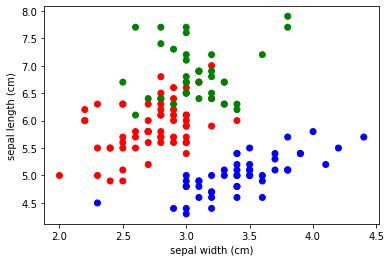

In [99]:
plt.scatter(data_array[:,1], data_array[:,0], c = color_list_kmeans)
plt.xlabel(iris.feature_names[1])
plt.ylabel(iris.feature_names[0])
plt.show()

In [22]:
data_array_plot = pd.DataFrame(iris['data'], columns = iris['feature_names'])
data_array_plot = data_array_plot.assign(species = iris['target'])
data_array_plot.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


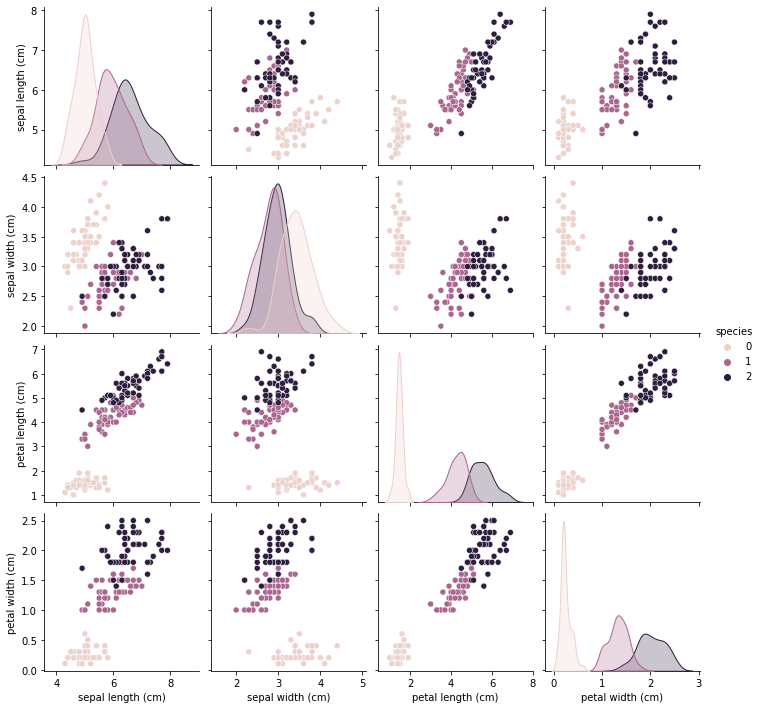

In [24]:
sns.pairplot(data_array_plot, hue = 'species')

### PCA
* Plot the transformed data
* print the explained variance

In [14]:
from sklearn.decomposition import PCA
plot = PCA()

In [15]:
pca = plot.fit_transform(data_array)

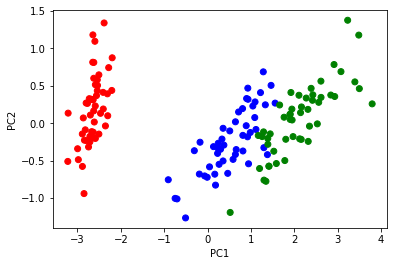

In [21]:
plt.scatter(pca[:,0], pca[:,1], c = color_list)
#plt.ylabel('True Positive Rate')
#plt.xlabel('False Positive Rate')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [17]:
print(plot.explained_variance_ratio_)

[0.92461872 0.05306648 0.01710261 0.00521218]


### t-SNE

In [ ]:
# T-SNE - NON-LINEAR transformation

In [25]:
from sklearn.manifold import TSNE

In [95]:
t_sne = TSNE(n_components=2,  perplexity=30, init = 'random')

In [96]:
tsne = t_sne.fit_transform(data_array)

/Users/kinam/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


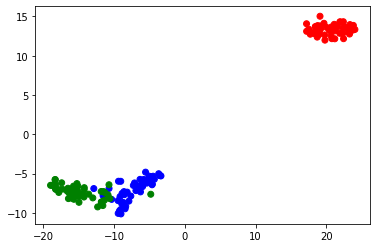

In [97]:
plt.scatter(tsne[:,0], tsne[:,1], c = color_list)

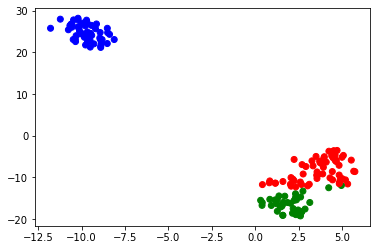

In [87]:
kmeans_cluster = plt.scatter(tsne[:,0], tsne[:,1], c = color_list_kmeans)

### KMeans
* Make a color_list_kmeans, and use it to make a scatter plot to compare with the real labels

In [ ]:
# Clustering - k-means -tell how many clusters - find center, next find cluster closer to the center

In [54]:
from sklearn.cluster import KMeans 

In [82]:
kmeans = KMeans(n_clusters=3, random_state=0)

In [83]:
data_array_kmeans = kmeans.fit(data_array)
print(data_array_kmeans)

KMeans(n_clusters=3, random_state=0)


In [84]:
labels = data_array_kmeans.labels_

In [85]:
color_list_kmeans = []
for l, label in enumerate(labels): 
    if label == 0:
        color_list_kmeans.append("red")
    elif label == 1:
        color_list_kmeans.append("blue")
    elif label == 2:
        color_list_kmeans.append("green")
   # elif label == 3:
       # color_list_kmeans.append("yellow")
   # elif label == 4:
        #color_list_kmeans.append("black")    

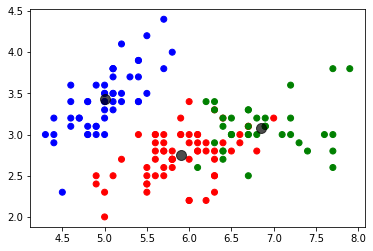

In [91]:
plt.scatter(data_array[:, 0], data_array[:, 1], c=color_list_kmeans)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.7)